In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [198]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [199]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)

df_all.head()

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0


In [200]:
df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_secondary.head()

,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS
School ID,,,,,,,,,,,,,,
300001,20,12,13,17,10,15,17,14,0,0,0,0,0,0
300002,240,288,229,258,225,231,261,207,0,0,0,0,0,0
300003,89,84,78,88,65,76,54,79,0,0,0,0,0,0
300004,38,47,47,54,39,42,52,45,0,0,0,0,0,0
300005,78,70,60,61,68,64,53,50,0,0,0,0,0,0


In [201]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [202]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe


In [203]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [204]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Rooms'] = (df_all['rooms.standard.academic'] + 
                             df_all['rooms.standard.unused'] + 
                             df_all['rooms.nonstandard.academic'] + 
                             df_all['rooms.nonstandard.unused'])
df_all['Other Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'])
                            
df_all['SPED Teachers'] = df_all['teachers.sped']

df_all['Total Teachers'] = df_all['Other Teachers'] + df_all['SPED Teachers']

df_all['ST Ratio'] = df_all['Enrolment'] / df_all['Total Teachers']

In [205]:
df_eda = df_all[['school.region','school.classification','school.classification2','school.type','school.urban','Enrolment','Total Elementary SPED Students','Total Secondary SPED Students','Total Rooms','Other Teachers','SPED Teachers','Total Teachers',' school.mooe ','ST Ratio']]

In [206]:
df_eda.replace([np.inf, -np.inf], np.nan, inplace=True)

In [207]:
df_eda_missing = (df_eda.isnull().sum() / len(df_eda))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
Total Secondary SPED Students,82.939402
Total Elementary SPED Students,17.332250
school.mooe,5.824474
ST Ratio,5.610575
Total Teachers,3.659815
SPED Teachers,3.659815
Other Teachers,3.659815
Total Rooms,0.733674
school.urban,0.322988
school.type,0.316571


In [209]:
df_eda_copy = df_eda
df_eda_copy['Total Elementary SPED Students'] = df_eda_copy['Total Elementary SPED Students'].fillna(0)
df_eda_copy['Total Secondary SPED Students'] = df_eda_copy['Total Elementary SPED Students'].fillna(0)

In [210]:
df_eda_copy.head()

,school.region,school.classification,school.classification2,school.type,school.urban,Enrolment,Total Elementary SPED Students,Total Secondary SPED Students,Total Rooms,Other Teachers,SPED Teachers,Total Teachers,school.mooe,ST Ratio
100001,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,90.0,0.0,0.0,2.0,2.0,0.0,2.0,84000.0,45.000000
100002,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,456.0,0.0,0.0,12.0,17.0,0.0,17.0,268000.0,26.823529
100003,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,167.0,0.0,0.0,6.0,7.0,0.0,7.0,135000.0,23.857143
100004,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,122.0,0.0,0.0,6.0,7.0,0.0,7.0,116000.0,17.428571
100005,Region I,Elementary,DepED Managed,School with no Annexes,Partially Urban,77.0,0.0,0.0,6.0,7.0,0.0,7.0,115000.0,11.000000


In [211]:
df_eda_missing_2 = (df_eda_copy.isnull().sum() / len(df_eda_copy))*100
df_eda_missing_2 = df_eda_missing_2.drop(df_eda_missing_2[df_eda_missing_2 == 0].index).sort_values(ascending = False)
missing_data_2 = pd.DataFrame({'Missing Percentage':df_eda_missing_2})
missing_data_2

,Missing Percentage
school.mooe,5.824474
ST Ratio,5.610575
Total Teachers,3.659815
SPED Teachers,3.659815
Other Teachers,3.659815
Total Rooms,0.733674
school.urban,0.322988
school.type,0.316571
school.classification2,0.316571
school.classification,0.316571


In [212]:
df_clean = df_eda_copy.dropna()
df_clean.shape

(41843, 14)

In [213]:
dropped_rows = df_eda.shape[0] - df_clean.shape[0]
dropped_rows

4908

In [214]:
df_clean.columns

Index(['school.region', 'school.classification', 'school.classification2',
       'school.type', 'school.urban', 'Enrolment',
       'Total Elementary SPED Students', 'Total Secondary SPED Students',
       'Total Rooms', 'Other Teachers', 'SPED Teachers', 'Total Teachers',
       ' school.mooe ', 'ST Ratio'],
      dtype='object')

In [215]:
df_elementary = df_clean[df_clean['school.classification']=='Elementary']
df_secondary =  df_clean[df_clean['school.classification']=='Secondary']

In [216]:
df_elementary.describe()

,Enrolment,Total Elementary SPED Students,Total Secondary SPED Students,Total Rooms,Other Teachers,SPED Teachers,Total Teachers,school.mooe,ST Ratio
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,3.594000e+04,35940.000000
mean,398.828186,1.005620,1.005620,8.676016,10.045437,0.049805,10.095242,2.105317e+05,39.074767
std,599.548676,8.434559,8.434559,8.798579,13.602010,0.576462,13.753553,2.289136e+05,15.764637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.800000e+04,0.000000
25%,134.000000,0.000000,0.000000,4.000000,4.000000,0.000000,4.000000,1.090000e+05,29.500000
50%,229.000000,0.000000,0.000000,6.000000,6.000000,0.000000,6.000000,1.440000e+05,37.333333
75%,416.000000,0.000000,0.000000,10.000000,11.000000,0.000000,11.000000,2.220000e+05,45.750000
max,10688.000000,344.000000,344.000000,123.000000,265.000000,45.000000,267.000000,3.797000e+06,496.000000


In [217]:
df_secondary.describe()

,Enrolment,Total Elementary SPED Students,Total Secondary SPED Students,Total Rooms,Other Teachers,SPED Teachers,Total Teachers,school.mooe,ST Ratio
count,5903.000000,5903.0,5903.0,5903.000000,5903.000000,5903.000000,5903.000000,5.903000e+03,5903.000000
mean,873.876842,0.0,0.0,15.020667,27.818059,0.043368,27.861426,8.965800e+05,37.164991
std,1088.916008,0.0,0.0,15.492204,36.534430,1.398848,36.576006,1.003348e+06,36.061400
min,7.000000,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.440000e+05,0.875000
25%,281.000000,0.0,0.0,6.000000,9.000000,0.000000,9.000000,3.610000e+05,25.890390
50%,503.000000,0.0,0.0,10.000000,16.000000,0.000000,16.000000,5.540000e+05,32.434783
75%,988.500000,0.0,0.0,18.000000,31.000000,0.000000,31.000000,9.895000e+05,39.687063
max,12613.000000,0.0,0.0,187.000000,514.000000,89.000000,514.000000,1.121800e+07,1570.000000


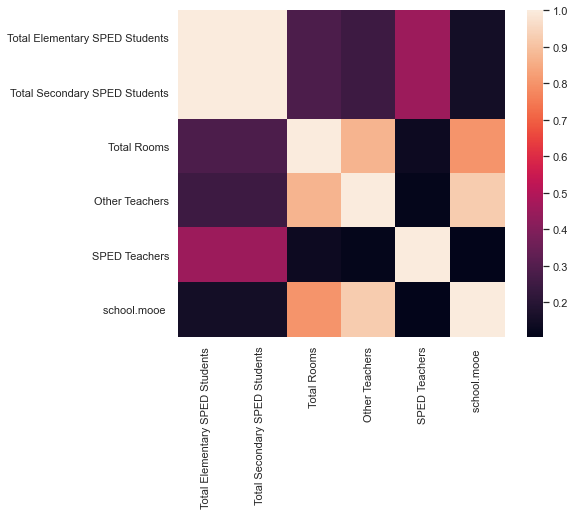

In [127]:
corrmat_eda = df_eda_copy.corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corrmat_eda, square = True)

The plot shows that: 
<br> 1.) There are more ***SPED Teachers*** in the **Elementary Grade** rather in the **Secondary Grade**.
<br> 2.) ***Other Teachers*** (Regular, Mobile, & Instructor) take much more of the room allocation rather than the *SPED Teachers*. This makes sense because the number of total enrolees for regular students is higher than SPED students.
<br> 3.) The number of ***total rooms*** is highly correlated with the ***school's budget***. This highly suggests that the higher the budget, the higher number of rooms a school can construct/offer.
<br> 4.) Also, a ***school's budget*** has something to do with their capability to hire/have more teachers. Based on the plot, it suggests that the higher the budget of a school, the greater the number of teachers they can deploy.

In [131]:
df_eda_clean['school.urban'].value_counts()

Partially Urban    36758
Urban               3588
Rural               1993
Name: school.urban, dtype: int64

ValueError: could not broadcast input array from shape (42339,1) into shape (42339)

<Figure size 432x288 with 0 Axes>

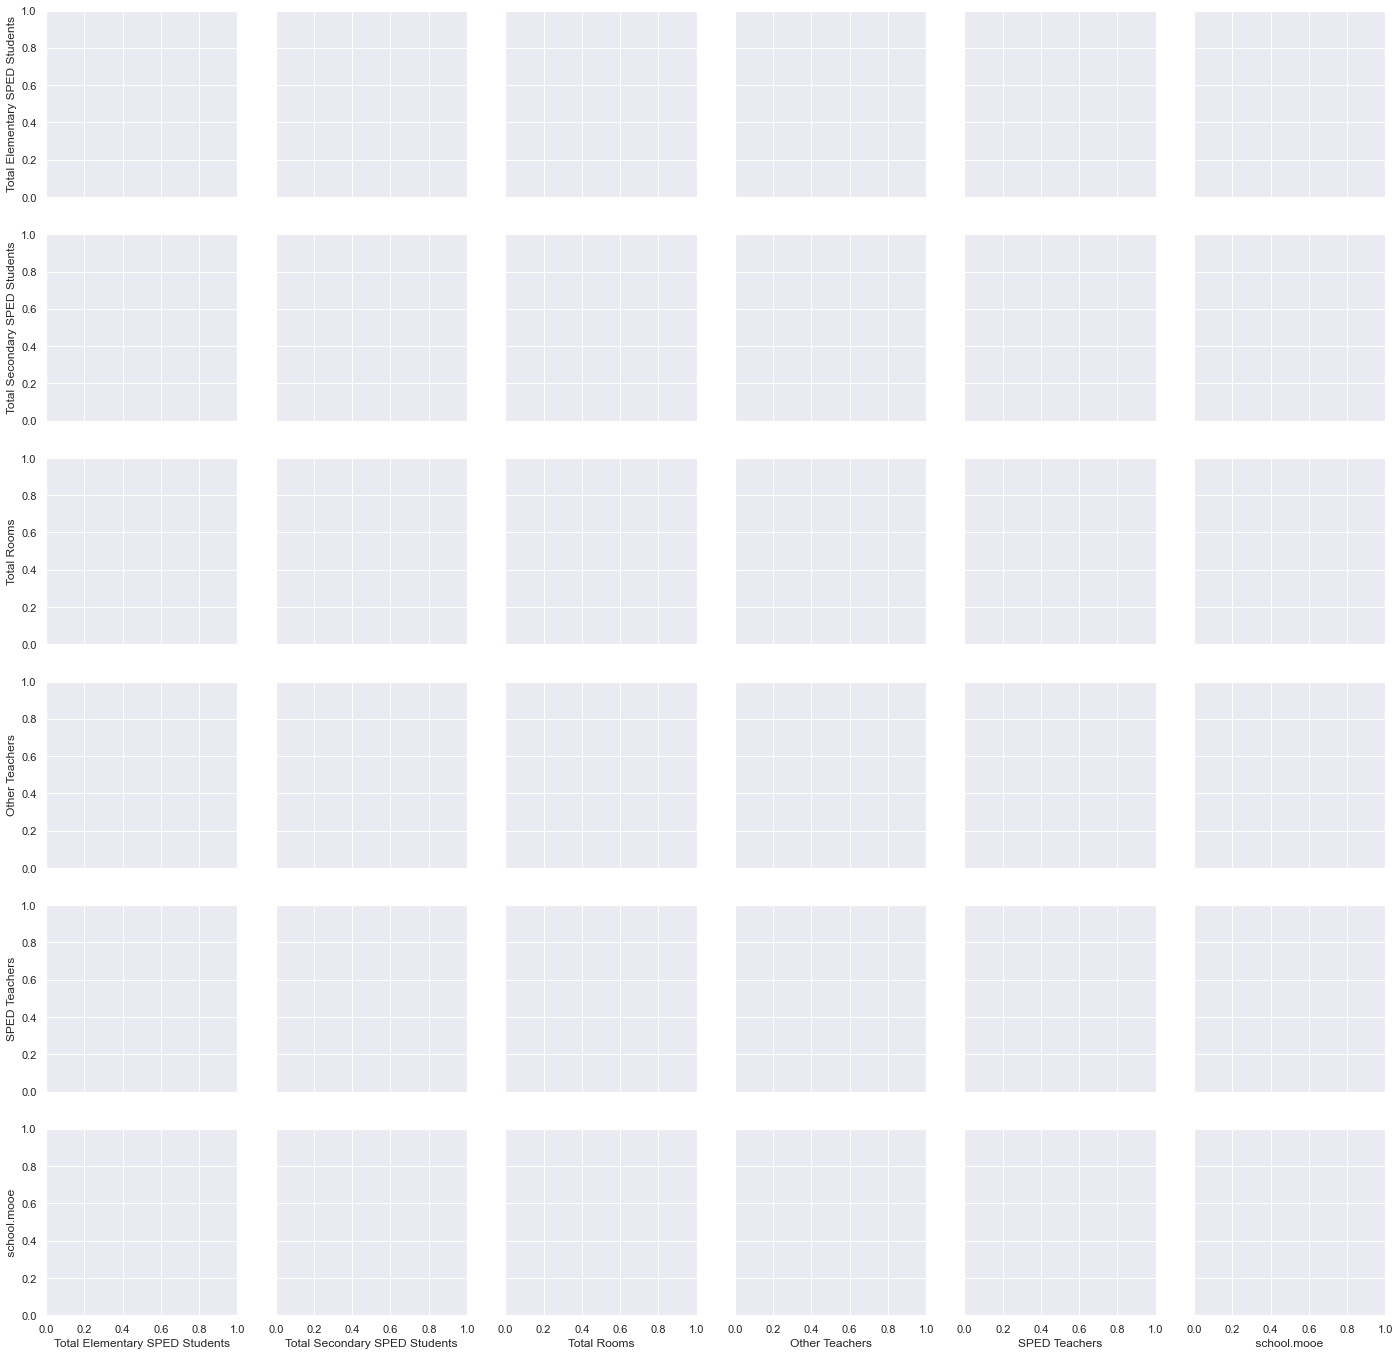

In [132]:
# Scatterplot all Features
cat_col = ['school.classification', 'school.classification2', 'school.type',
       'school.urban']
for col in cat_col:
    sns.set()
    cols = ['Total Elementary SPED Students', 'Total Secondary SPED Students', 'Total Rooms', 'Other Teachers',
       'SPED Teachers', ' school.mooe ']
    plt.figure()
    sns.pairplot(df_eda_clean, size = 4.0, hue = ['school.classification'])
    plt.show

In [ ]:
sns.pairplot(df_eda_clean, size = 3.0, hue = 'school.classification')

# K-Means Clustering

In [218]:
df_elementary_kmeans = df_elementary[['ST Ratio',' school.mooe ','Total Rooms']]
df_secondary_kmeans = df_secondary[['ST Ratio',' school.mooe ','Total Rooms']]

### Elementary Data

In [221]:
df_elementary_kmeans.head()

,ST Ratio,school.mooe,Total Rooms
100001,45.000000,84000.0,2.0
100002,26.823529,268000.0,12.0
100003,23.857143,135000.0,6.0
100004,17.428571,116000.0,6.0
100005,11.000000,115000.0,6.0


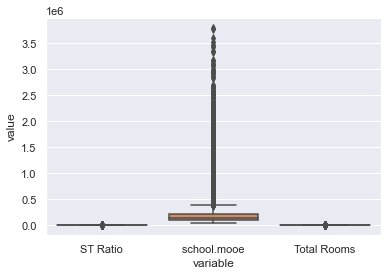

In [222]:
melted = df_elementary_kmeans.melt()

sns.boxplot(melted.variable, melted.value)

In [237]:
#Remove MOOE outliers

Q1 = df_elementary_kmeans[' school.mooe '].quantile(0.05)
Q3 = df_elementary_kmeans[' school.mooe '].quantile(0.95)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans[' school.mooe '] <= Q3 + 1.5*IQR)])

In [239]:
#Remove ST Ratio outliers
Q1 = df_elementary_kmeans['ST Ratio'].quantile(0.05)
Q3 = df_elementary_kmeans['ST Ratio'].quantile(0.95)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

In [285]:
from mpl_toolkits.mplot3d import Axes3D

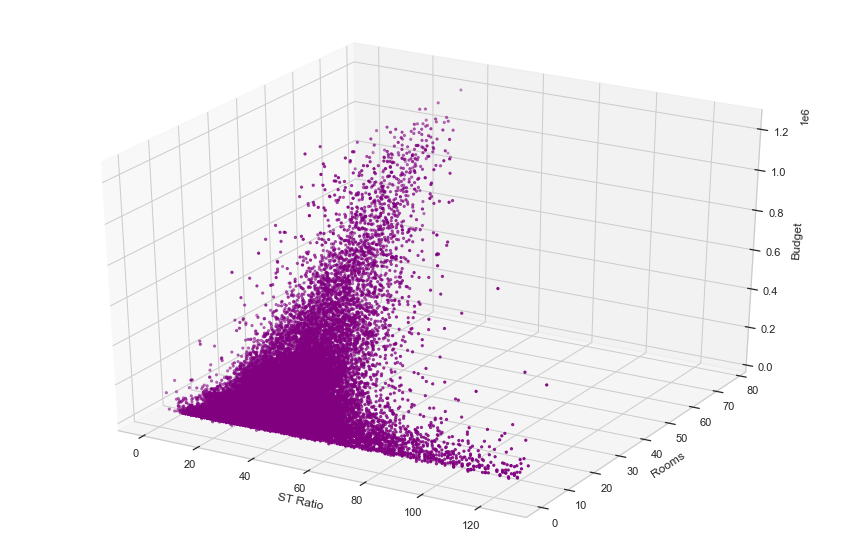

In [286]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Total Rooms']
Budget = df_elementary_kmeans[' school.mooe ']
ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()

In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_elementary_kmeans_scaled = scaler.fit_transform(df_elementary_kmeans)

In [242]:
print(df_elementary_kmeans_scaled.min())
print(df_elementary_kmeans_scaled.max())

-2.75770589043465
9.61649757337013


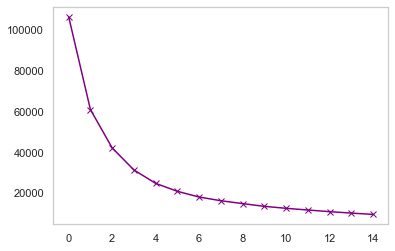

In [263]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_elementary_kmeans_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd,'bx-',c='purple')

In [251]:
cluster_labels

array([1, 2, 2, ..., 1, 2, 1])

In [252]:
df_elementary_kmeans_scaled

array([[ 0.4514005 , -0.69734782, -0.86460555],
       [-0.84482679,  0.467035  ,  0.53287487],
       [-1.05637012, -0.37461128, -0.30561338],
       ...,
       [ 1.87767   , -0.43789295, -0.30561338],
       [ 0.13048986, -0.72266049, -0.58510947],
       [ 0.60699354,  1.06188275,  0.39312683]])

In [253]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_elementary_kmeans_scaled)
cluster_labels = kmeans.predict(df_elementary_kmeans_scaled)   

df_elementary_kmeans['Cluster_Labels'] = cluster_labels
df_elementary_kmeans['Cluster_Labels'].value_counts()

2    20978
1    11277
0     3210
Name: Cluster_Labels, dtype: int64

In [254]:
df_elementary_kmeans

,ST Ratio,school.mooe,Total Rooms,Cluster_Labels
100001,45.000000,84000.0,2.0,1
100002,26.823529,268000.0,12.0,2
100003,23.857143,135000.0,6.0,2
100004,17.428571,116000.0,6.0,2
100005,11.000000,115000.0,6.0,2
...,...,...,...,...
256001,76.500000,147000.0,5.0,1
256501,112.500000,94000.0,4.0,1
259006,65.000000,125000.0,6.0,1
260501,40.500000,80000.0,4.0,2


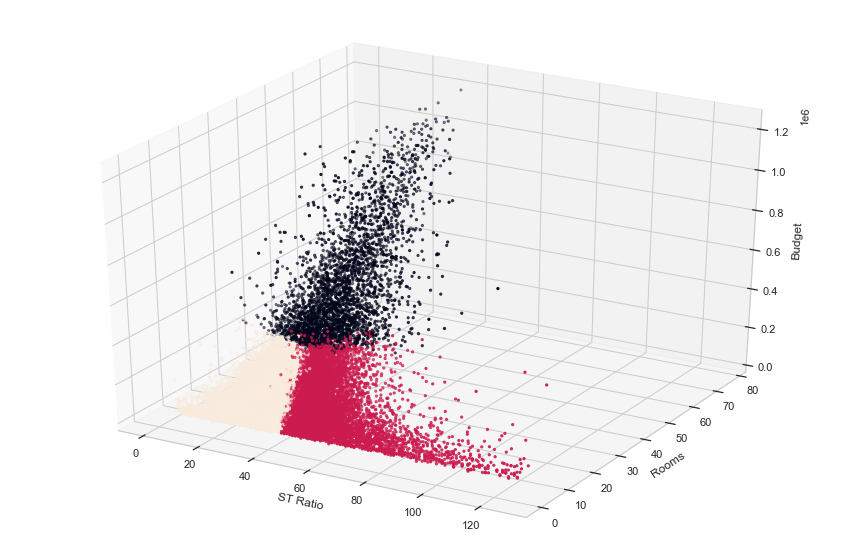

In [259]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Total Rooms']
Budget = df_elementary_kmeans[' school.mooe ']
Cluster = df_elementary_kmeans['Cluster_Labels']
ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()

### Secondary Data

In [264]:
df_secondary_kmeans.head()

,ST Ratio,school.mooe,Total Rooms
300001,16.857143,232000.0,4.0
300002,29.378788,1839000.0,43.0
300003,21.137931,701000.0,18.0
300004,30.333333,440000.0,11.0
300005,10.080000,793000.0,14.0


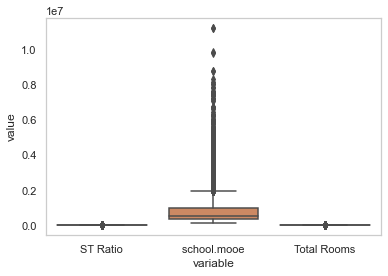

In [265]:
melted = df_secondary_kmeans.melt()

sns.boxplot(melted.variable, melted.value)

In [266]:
#Remove MOOE outliers

Q1 = df_secondary_kmeans[' school.mooe '].quantile(0.05)
Q3 = df_secondary_kmeans[' school.mooe '].quantile(0.95)
IQR = Q3 - Q1
df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_secondary_kmeans[' school.mooe '] <= Q3 + 1.5*IQR)])

In [267]:
#Remove ST Ratio outliers
Q1 = df_secondary_kmeans['ST Ratio'].quantile(0.05)
Q3 = df_secondary_kmeans['ST Ratio'].quantile(0.95)
IQR = Q3 - Q1
df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_secondary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

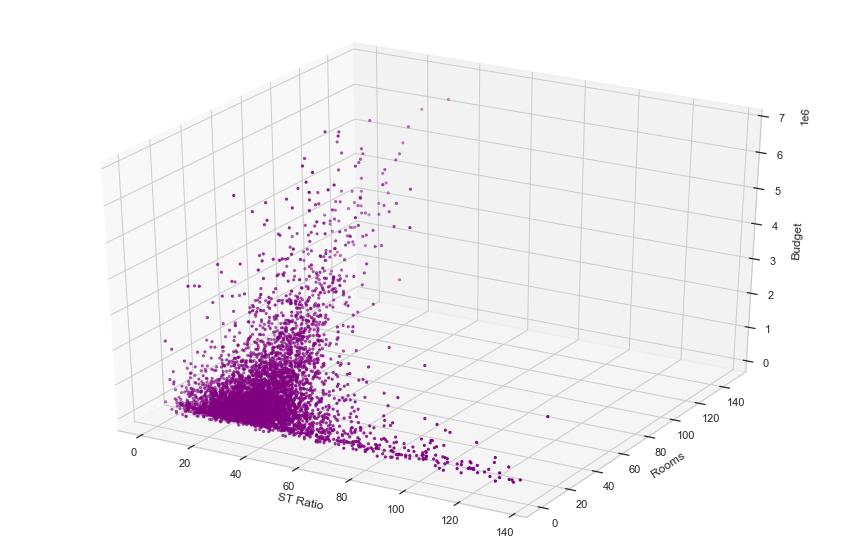

In [277]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_secondary_kmeans['ST Ratio']
Rooms = df_secondary_kmeans['Total Rooms']
Budget = df_secondary_kmeans[' school.mooe ']
ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_secondary_kmeans_scaled = scaler.fit_transform(df_secondary_kmeans)

In [279]:
print(df_secondary_kmeans_scaled.min())
print(df_secondary_kmeans_scaled.max())

-2.2426742086975175
9.30882299934463


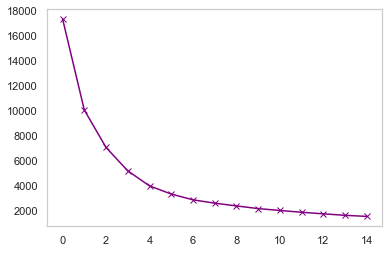

In [280]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_secondary_kmeans_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd,'bx-',c='purple')

In [283]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_secondary_kmeans_scaled)
cluster_labels = kmeans.predict(df_secondary_kmeans_scaled)   

df_secondary_kmeans['Cluster_Labels'] = cluster_labels
df_secondary_kmeans['Cluster_Labels'].value_counts()

0    4667
1     651
2     473
Name: Cluster_Labels, dtype: int64

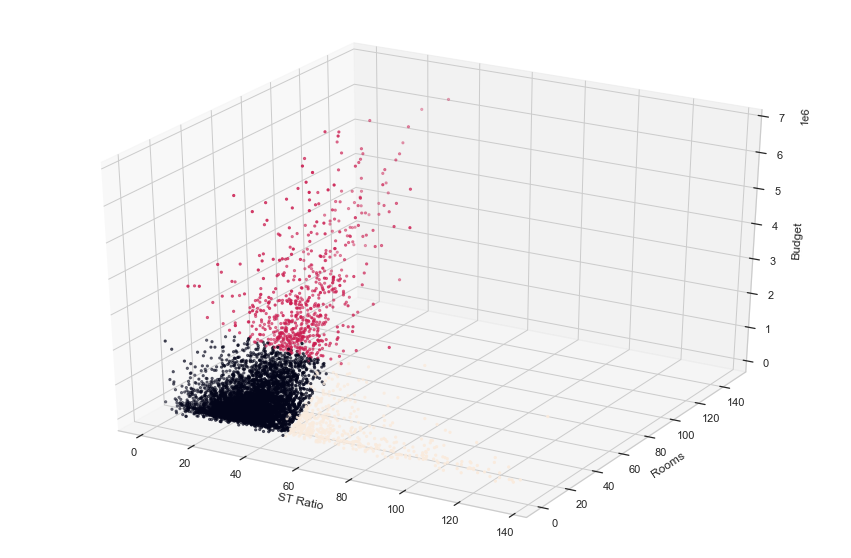

In [284]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_secondary_kmeans['ST Ratio']
Rooms = df_secondary_kmeans['Total Rooms']
Budget = df_secondary_kmeans[' school.mooe ']
Cluster = df_secondary_kmeans['Cluster_Labels']
ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)

ax.set_xlabel('ST Ratio')
ax.set_ylabel('Rooms')
ax.set_zlabel('Budget')

plt.show()